In [1]:
import pandas as pd
import numpy as np

In [2]:
orders = pd.read_csv("orders_dataset.csv")
order_review = pd.read_csv("order_reviews_dataset.csv")

In [3]:
dfs = {"orders": orders,
       "order_review": order_review,
      }

for name, df in dfs.items():
    print(f"\n===== {name.upper()} DATASET INFO =====")
    df.info()
    print("Number of duplicate row: ")
    df.duplicated().sum()


===== ORDERS DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Number of duplicate row: 

===== ORDER_REVIEW DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---

### *PERFORM MERGE OPERATION*

In [4]:
## Sort reviews by time -- Cause we want the latest review
reviews_sorted = order_review.sort_values(
    by="review_creation_date"
)
## Keep only ONE review per order
latest_reviews = reviews_sorted.drop_duplicates(
    subset="order_id",
    keep="last"
)
order_review = orders.merge(
    latest_reviews,
    on="order_id",
    how="left"
)

In [5]:
order_review.shape

(99441, 14)

In [6]:
df = order_review.copy()

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   review_id                      98673 non-null  object 
 9   review_score                   98673 non-null  float64
 10  review_comment_title           11552 non-null  object 
 11  review_comment_message         40776 non-null  object 
 12  review_creation_date           98673 non-null 

In [9]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


### *"Convert date time column"*

In [10]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

In [11]:
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

In [12]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,-18.0


### CLASSIFYING ORDERS 
#### 1.delay_days>0 = "LATE Dalivery" && delay_days <= 0 == "ON_TIME Delivery"

In [14]:
## Update the column "Delivery_delay_days"
df['delay_days'] = df['delivery_delay_days'].apply(
    lambda x: "VERY_LATE" if x > 10
    else "LATE" if x > 0
    else "EARLY" if x < 0
    else "ON_TIME"
)

In [18]:
df[df['delivery_delay_days']>0 ].count()

order_id                         6535
customer_id                      6535
order_status                     6535
order_purchase_timestamp         6535
order_approved_at                6535
order_delivered_carrier_date     6534
order_delivered_customer_date    6535
order_estimated_delivery_date    6535
review_id                        6382
review_score                     6382
review_comment_title              708
review_comment_message           3762
review_creation_date             6382
review_answer_timestamp          6382
delivery_delay_days              6535
delay_days                       6535
dtype: int64

In [19]:
df['has_review'] = df['review_score'].notna().map({True: 'YES', False: 'NO'})
df.groupby('delay_days')['has_review'].value_counts(normalize=True)* 100

delay_days  has_review
EARLY       YES           99.457411
            NO             0.542589
LATE        YES           98.063935
            NO             1.936065
ON_TIME     YES           96.852243
            NO             3.147757
VERY_LATE   YES           96.798853
            NO             3.201147
Name: proportion, dtype: float64

In [21]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay_days,delay_days,has_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-8.0,EARLY,YES
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,-6.0,EARLY,YES
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,-18.0,EARLY,YES


In [25]:
df['delay_days'].value_counts()

delay_days
EARLY        88649
LATE          4442
ON_TIME       4257
VERY_LATE     2093
Name: count, dtype: int64

### *CLASSIFYING RISK*
#### 2.Classify each order into two risk categories 
#### =>Late + Bad Review (≤2) → Visible Failure 
#### =>Late + No Review → Silent Risk

In [27]:
df['risk_type'] = np.where(
    (df['delivery_delay_days'] > 0) & (df['review_score'] <= 2),
    'VISIBLE_FAILURE',
    np.where(
        (df['delivery_delay_days'] > 0) & (df['review_score'].isna()),
        'SILENT_RISK',
        'NORMAL'
    )
)

### *Calculating Avg score for "LATE" and "ON_TIME" delivery*

In [28]:
df['review_score'].unique() # to check how many unique value exist

array([ 4.,  5.,  2.,  1., nan,  3.])

In [30]:
df[df['delay_days'].isin(['LATE', 'VERY_LATE','ON_TIME'])] \
  .groupby('delay_days')['review_score'] \
  .mean()

delay_days
LATE         2.532140
ON_TIME      2.456949
VERY_LATE    1.709279
Name: review_score, dtype: float64

In [31]:
df[df['delay_days'].isin(['LATE'])].groupby('delay_days')['review_score'].value_counts(normalize=True)* 100

delay_days  review_score
LATE        1.0             46.464646
            5.0             20.913682
            4.0             12.603306
            3.0             11.730946
            2.0              8.287420
Name: proportion, dtype: float64

### *ACKNOWLEDGEMENT:* Late deliveries have a significantly lower average review score (≈2) compared to on-time deliveries. Additionally, around 54% of late orders receive a rating of 2 stars or below, indicating that delivery delays strongly contribute to customer dissatisfaction and negative reviews.

In [32]:
df[df['delivery_delay_days']>0].shape

(6535, 18)

#### *Conclusion:* Late deliveries are significant but small

In [33]:
df['delivery_delay_days'].max()

188.0

#### *conclusion:* The extreme delay gap is 188 days, this is an outlier maybe we will handel this later 

In [34]:
((df['delivery_delay_days'] > 0).mean())*100

6.571736004263835

#### *Conclusion:* 6.5% of the rows are "LATE" in that column.

In [35]:
df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [36]:
df[df['order_status'].isin(['delivered', 'canceled'])] \
  .groupby('delay_days')['order_status'] \
  .value_counts(normalize=True) * 100

delay_days  order_status
EARLY       delivered        99.994360
            canceled          0.005640
LATE        delivered       100.000000
ON_TIME     delivered        67.743616
            canceled         32.256384
VERY_LATE   delivered        99.952222
            canceled          0.047778
Name: proportion, dtype: float64

### *PERFORMING MERGE OPERATION WITH ANOTHER TABLE*

In [37]:
order_items = pd.read_csv("order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [38]:
order_items.duplicated().sum()

0

In [39]:
df = order_items.merge(
    df,
    on="order_id",
    how="left"
)

In [40]:
df.shape

(112650, 24)

### *Logistics stage analysis*
#### *Compute time gaps:*
    =>purchase → approved
    =>approved → shipped
    =>shipped → delivered

In [41]:
list(df.columns)

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'delivery_delay_days',
 'delay_days',
 'has_review',
 'risk_type']

In [42]:
df['purchase_approved_gap'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days
df['approved_shipped_gap'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.days
df['shipped_delivered_gap'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

In [44]:
print("Avarage purchase_approved_gap:",df.loc[df['delivery_delay_days'] > 0, 'purchase_approved_gap'].mean())
print("Avarage approved_shipped_gap:",df.loc[df['delivery_delay_days'] > 0, 'approved_shipped_gap'].mean())
print("Avarage shipped_delivered_gap:",df.loc[df['delivery_delay_days'] > 0, 'shipped_delivered_gap'].mean())

Avarage purchase_approved_gap: 0.3519614590502409
Avarage approved_shipped_gap: 5.235132158590308
Avarage shipped_delivered_gap: 27.022577092511014


### *Conclusion:* Primary delay cause = courier / logistics stage (shipped → delivered).Payment and seller processing are not the main issues

In [76]:
positive = (df['shipped_delivered_gap'] > 0).sum()
negative = (df['shipped_delivered_gap'] < 0).sum()
print(positive)
print(negative)

107000
0


In [75]:
df = df[df['shipped_delivered_gap'] >= 0]

In [74]:
print("Max purchase_approved_gap:",df['purchase_approved_gap'].max())
print("Max approved_shipped_gap:",df['approved_shipped_gap'].max())
print("Max shipped_delivered_gap:",df['shipped_delivered_gap'].max())

Max purchase_approved_gap: 60.0
Max approved_shipped_gap: 125.0
Max shipped_delivered_gap: 205.0


### "There are no chance in the Earth that ship would be done after delivery but negetive value of 'shipped_delivered_gap' this column shows that it is happening. It is a issue or DATA ENTRY glitch, so we have to remove that 50 rows"

In [79]:
upper_bound1 = df['purchase_approved_gap'].quantile(0.97) 
upper_bound2 = df['approved_shipped_gap'].quantile(0.97)  
upper_bound3 = df['shipped_delivered_gap'].quantile(0.97)  # cap at 97th percentile
print(upper_bound1)
print(upper_bound2)
print(upper_bound3)

2.0
11.0
28.0


### *"97% of data falls under this, so there are only 3% of or maybe less than 3% of extreme large values exists in the data. We are not removing them because those can be real world delays, In case of package lossing or logistic delays OR in the other cases maybe the package was imported from other country so the delay is maybe natural and real world"*

### *HANDLING OUTLIERS*

In [46]:
df['delivery_delay_days'].min()

-147.0

<Axes: ylabel='delivery_delay_days'>

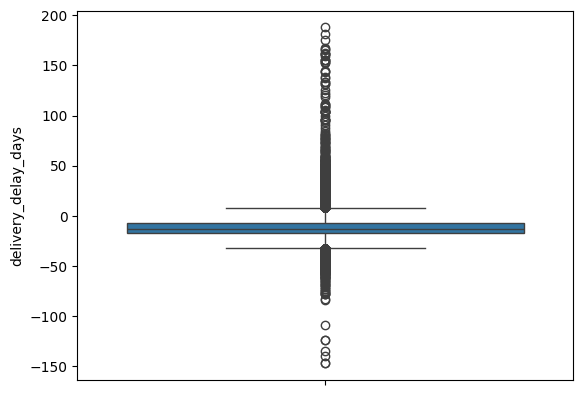

In [48]:
import seaborn as sns
sns.boxplot(df['delivery_delay_days'])

In [50]:
Q1 = df['delivery_delay_days'].quantile(0.25)
Q3 = df['delivery_delay_days'].quantile(0.75)
IQR = Q3 - Q1 #INTER QUARTILE RANGE

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#### *“Delivery delays above 50 days were treated as data anomalies and excluded.”*

In [51]:
df['delivery_delay_days'] = df['delivery_delay_days'].clip(lower=lower_bound, upper=50)
df['delivery_delay_days'].max()

50.0

In [53]:
((df['delivery_delay_days'] > 10).sum()/(df['delivery_delay_days'] > 0).sum())*100

31.631108052305574

#### *31% of orders are in "VERY_LATE" category from all "LATE" category orders*

### *"ORDER CANCELLATION AFTER PAYMENT"*

In [61]:
delay = (
    (df['order_status'] == 'canceled') &
    (df['order_approved_at'].notna()) &
    (df['delivery_delay_days'] > 0)
)

nondelay = (
    (df['order_status'] == 'canceled') &
    (df['order_approved_at'].notna()) &
    (df['delivery_delay_days'] <= 0)
)

unknown = (
    (df['order_status'] == 'canceled') &
    (df['order_approved_at'].notna()) &
    (df['delivery_delay_days'].isna())
)

print("Delayed:", delay.sum())
print("Non-Delayed:", nondelay.sum())
print("Unknown (not delivered):", unknown.sum())

Delayed: 1
Non-Delayed: 6
Unknown (not delivered): 535


### *FINAL CONCLUSION:* "An order is considered failed if it is delivered more than 10 days late, canceled after payment approval, or receives a review score ≤2."

### *TASK 1: "Let's find out how much total order delay is caused by courier"*

In [95]:
print("Late & purchase_approved_gap > threshold:", ((df['delivery_delay_days'] > 0) & (df['purchase_approved_gap'] > 5)).sum())
print("Late & approved_shipped_gap > threshold:", ((df['delivery_delay_days'] > 0) & (df['approved_shipped_gap'] > 11)).sum())
print("Late & shipped_delivered_gap > threshold:", ((df['delivery_delay_days'] > 0) & (df['shipped_delivered_gap'] > 10)).sum())

Late & purchase_approved_gap > threshold: 23
Late & approved_shipped_gap > threshold: 978
Late & shipped_delivered_gap > threshold: 6225


In [85]:
df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,delivery_delay_days,delay_days,has_review,risk_type,purchase_approved_gap,approved_shipped_gap,shipped_delivered_gap
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,-9.0,EARLY,YES,NORMAL,0.0,6.0,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,-3.0,EARLY,YES,NORMAL,0.0,8.0,8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,-14.0,EARLY,YES,NORMAL,0.0,1.0,6.0


In [93]:
# Group by Delivery_Type and calculate average of all three gaps
avg_gaps = df.groupby('delay_days')[
    ['purchase_approved_gap', 'approved_shipped_gap', 'shipped_delivered_gap']
].mean().reset_index()

# Rename columns for clarity
avg_gaps.columns = [
    'delay_days',
    'Avg_Pur_App_Gap',
    'Avg_App_Ship_Gap',
    'Avg_Ship_Del_Gap'
]

print(avg_gaps)

  delay_days  Avg_Pur_App_Gap  Avg_App_Ship_Gap  Avg_Ship_Del_Gap
0      EARLY         0.264475          2.112576          7.356656
1       LATE         0.352195          4.817962         20.533427
2    ON_TIME         0.331034          3.711724         13.880690
3  VERY_LATE         0.351610          6.136641         41.045692


### *“Compared to ON_TIME orders (13.9 days), LATE orders take ~6.6 extra days and VERY_LATE orders take ~27 extra days in the shipped → delivered stage, indicating courier performance is the primary contributor to delivery delays.”*

### *Task 2: "Check the severe delays"*
####    Severe delay = shipped → delivered > 97th percentile

In [109]:
upper = df['shipped_delivered_gap'].quantile(0.97)
severe_delays = df[df['shipped_delivered_gap'] > upper]
count = severe_delays.shape
print("The total number of severe delay is:",count)

The total number of severe delay is: (3246, 27)


In [107]:
severe_delays['order_status'].value_counts()

order_status
delivered    3245
canceled        1
Name: count, dtype: int64

In [110]:
severe_summary = severe_delays.groupby('order_status')[
    'review_score'
].count().reset_index()

print(severe_summary)

  order_status  review_score
0     canceled             1
1    delivered          3140


In [115]:
severe_delays.groupby('order_status')['review_score'].agg(['count','mean']).round(2)

,count,mean
order_status,,
canceled,1,3.00
delivered,3140,2.05


### *"Severe courier delays (top 3% of shipped-to-delivered time) impact only a small share of orders but cause outsized customer dissatisfaction. Although over 99% of these orders are eventually delivered, they receive very low review scores (around 2.0 based on thousands of reviews). Canceled orders rarely receive reviews, making customer pain largely visible only when severely delayed orders are delivered rather than canceled."*

### *TASK 3: "Convert insight to BUSINESS ACTION"*

In [119]:
shipping_delay_threshold = df['approved_shipped_gap'].quantile(0.95)
df.loc[:, 'courier_risk_flag'] = (
    (df['approved_shipped_gap'] > shipping_delay_threshold) |
    (df['purchase_approved_gap'] > df['purchase_approved_gap'].quantile(0.95))
).map({True: 'HIGH_RISK', False: 'NORMAL'})

In [120]:
df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_creation_date,review_answer_timestamp,delivery_delay_days,delay_days,has_review,risk_type,purchase_approved_gap,approved_shipped_gap,shipped_delivered_gap,courier_risk_flag
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-21 00:00:00,2017-09-22 10:57:03,-9.0,EARLY,YES,NORMAL,0.0,6.0,1.0,NORMAL
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-13 00:00:00,2017-05-15 11:34:13,-3.0,EARLY,YES,NORMAL,0.0,8.0,8.0,NORMAL
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-23 00:00:00,2018-01-23 16:06:31,-14.0,EARLY,YES,NORMAL,0.0,1.0,6.0,NORMAL


In [129]:
extreme_threshold = df['shipped_delivered_gap'].quantile(0.97)
df['extreme_delay_flag'] = (df['shipped_delivered_gap'] > extreme_threshold).astype(int)

courier_delay_stats = df.groupby('seller_id').agg(
    total_orders=('order_id', 'count'),
    extreme_delays=('extreme_delay_flag', 'sum')
).reset_index()

courier_delay_stats['extreme_delay_pct'] = (
    courier_delay_stats['extreme_delays'] / courier_delay_stats['total_orders'] * 100
)

worst_couriers = courier_delay_stats.sort_values(by='extreme_delay_pct', ascending=False)
print(worst_couriers.count())

seller_id            2968
total_orders         2968
extreme_delays       2968
extreme_delay_pct    2968
dtype: int64


In [131]:
df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_answer_timestamp,delivery_delay_days,delay_days,has_review,risk_type,purchase_approved_gap,approved_shipped_gap,shipped_delivered_gap,courier_risk_flag,extreme_delay_flag
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-22 10:57:03,-9.0,EARLY,YES,NORMAL,0.0,6.0,1.0,NORMAL,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15 11:34:13,-3.0,EARLY,YES,NORMAL,0.0,8.0,8.0,NORMAL,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-23 16:06:31,-14.0,EARLY,YES,NORMAL,0.0,1.0,6.0,NORMAL,0


In [130]:
df.drop(columns=['avg_courier_delay'], inplace=True)
df.drop(columns=['likely_late_flag'], inplace=True)

In [132]:
df.to_csv('C:/Users/ASMIT/OneDrive/Desktop/Csv Files/Master_data_Ecommerce.csv', index = False)

In [4]:
import pandas as pd
df = pd.read_csv('Master_data_Ecommerce.csv')
Late_order_total = df[df['delivery_delay_days']>0].shape[0]
total_no_orders = df['delivery_delay_days'].shape[0]
print("Late_order_total:",Late_order_total)
print("total_no_orders:",total_no_orders)
percetage_of_late_orders = ((Late_order_total/total_no_orders)*100)
print("percetage_of_late_order:",percetage_of_late_orders)

Late_order_total: 7264
total_no_orders: 110145
percetage_of_late_order: 6.594943029642744


### *"MERGE OPERATION to calculate estimate revenue loss"*

In [6]:
order_payments_dataset = pd.read_csv("order_payments_dataset.csv")

Master_data_Ecommerce = df.merge(
    order_payments_dataset,
    on="order_id",
    how="left"
)

In [7]:
Master_data_Ecommerce.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,risk_type,purchase_approved_gap,approved_shipped_gap,shipped_delivered_gap,courier_risk_flag,extreme_delay_flag,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,NORMAL,0.0,6.0,1.0,NORMAL,0,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,NORMAL,0.0,8.0,8.0,NORMAL,0,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,NORMAL,0.0,1.0,6.0,NORMAL,0,1.0,credit_card,5.0,216.87


In [8]:
Master_data_Ecommerce.to_csv('C:/Users/ASMIT/OneDrive/Desktop/Csv Files/Master_data_Ecommerce.csv', index = False)

In [9]:
df = pd.read_csv('Master_data_Ecommerce.csv')

In [17]:
Late_orders_value = df[df['delivery_delay_days'] > 0]['payment_value'].sum()
Total_orders_value = df['payment_value'].sum()
Revenue_at_risk = (Late_orders_value/Total_orders_value)*100

In [18]:
print(Revenue_at_risk)

6.923115401986547


C:\Users\ASMIT\AppData\Local\Temp\ipykernel_21260\533679315.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('delay_bucket')['payment_value']


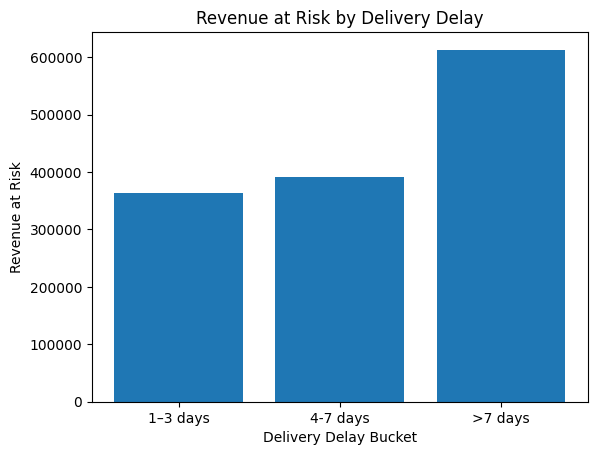

In [21]:
df['delay_bucket'] = pd.cut(
    df['delivery_delay_days'],
    bins=[0, 3, 7, df['delivery_delay_days'].max()],
    labels=['1–3 days', '4-7 days', '>7 days']
)
revenue_at_risk = (
    df[df['delivery_delay_days'] > 0]
    .groupby('delay_bucket')['payment_value']
    .sum()
    .reset_index()
)
import matplotlib.pyplot as plt

plt.figure()
plt.bar(revenue_at_risk['delay_bucket'], revenue_at_risk['payment_value'])
plt.xlabel('Delivery Delay Bucket')
plt.ylabel('Revenue at Risk')
plt.title('Revenue at Risk by Delivery Delay')
plt.show()

In [27]:
Master_data_Ecommerce.shape

(114977, 33)

In [23]:
df.shape

(114977, 34)

In [24]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,purchase_approved_gap,approved_shipped_gap,shipped_delivered_gap,courier_risk_flag,extreme_delay_flag,payment_sequential,payment_type,payment_installments,payment_value,delay_bucket
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,0.0,6.0,1.0,NORMAL,0,1.0,credit_card,2.0,72.19,NaN
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,0.0,8.0,8.0,NORMAL,0,1.0,credit_card,3.0,259.83,NaN
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,0.0,1.0,6.0,NORMAL,0,1.0,credit_card,5.0,216.87,NaN
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,0.0,2.0,4.0,NORMAL,0,1.0,credit_card,2.0,25.78,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,0.0,11.0,13.0,HIGH_RISK,0,1.0,credit_card,3.0,218.04,NaN


In [25]:
df.to_csv('C:/Users/ASMIT/OneDrive/Desktop/Csv Files/Master_data_Ecommerce.csv', index = False)